# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [64]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [65]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [66]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [67]:
df = pd.read_csv('/content/foodhub_order.csv')

In [68]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [69]:
df.shape


(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. Below are the different datatypes columns
  * 4 - integer datatype columns
  * 1 - float datatype column
  * 4 - String datatype columns in the dataset


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [71]:
df.isnull().values.any()

np.False_

#### Observations:
There is no missing values in the dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [73]:
min_t = df['food_preparation_time'].min()
average_t = df['food_preparation_time'].mean()
max_t = df['food_preparation_time'].max()
print(f'The minimun ,average and maximm time for food preparation are {min_t}, {average_t}, {max_t}')

The minimun ,average and maximm time for food preparation are 20, 27.371970495258168, 35


#### Observations:
 * Minimun food preparation time : 20
 * Average food preparation time : 27.371970495258168
 * Maximm  food preparation time : 35

### **Question 5:** How many orders are not rated? [1 mark]

In [74]:
(df['rating'] == 'Not given').sum()

np.int64(736)

#### Observations:
1. There are 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### General ( Data Sanity Check )

In [75]:
# Analyze each column and the data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [76]:
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns')

There are 1898 rows and 9 columns


In [77]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [78]:
df['order_id'].is_unique

True

In [79]:
df['restaurant_name'].apply(type).value_counts()

,count
restaurant_name,
<class 'str'>,1898


In [80]:
df['cuisine_type'].apply(type).value_counts()

,count
cuisine_type,
<class 'str'>,1898


In [81]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [82]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [83]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [84]:
df['customer_id'].nunique()

1200

In [85]:
df.isnull().values.any()

np.False_

In [86]:
df.isna().values.any()

np.False_

In [87]:
df.duplicated().sum()

np.int64(0)

##### Observation:
 1. There is no null, nan, in the DataSet
 2. There is no duplicate records in the dataset.
 3. order_id, customer_id, food_preparation_time, food_delivery_time columns are numerical
 4. There are 1200 unique customers in the dataset
 5. Based on the column level analysis, there is no missing values in the dataset.

#### Histograms

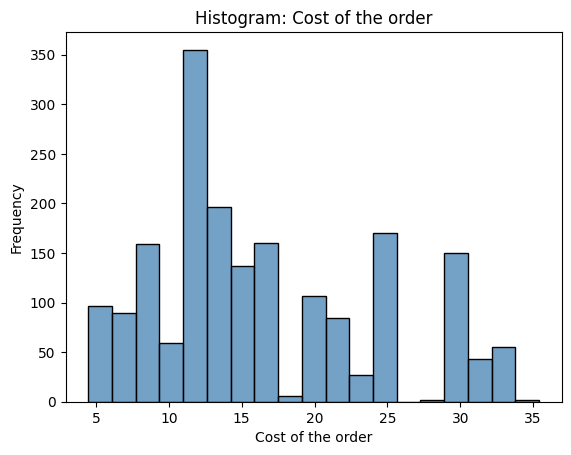

In [88]:
plt.title('Histogram: Cost of the order')
plt.xlabel('Cost of the order')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order', color='steelblue');

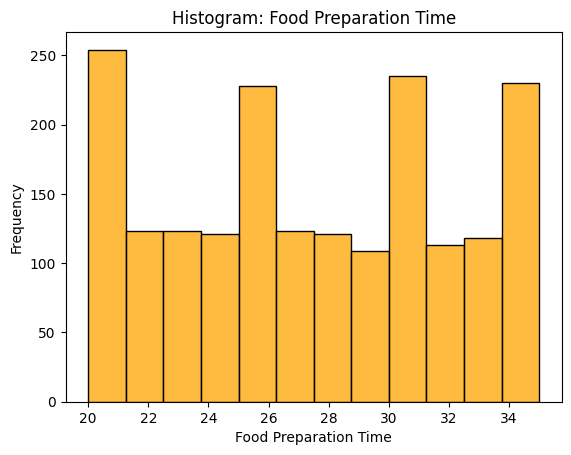

In [89]:
plt.title('Histogram: Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
sns.histplot(data=df,x='food_preparation_time', color='orange');

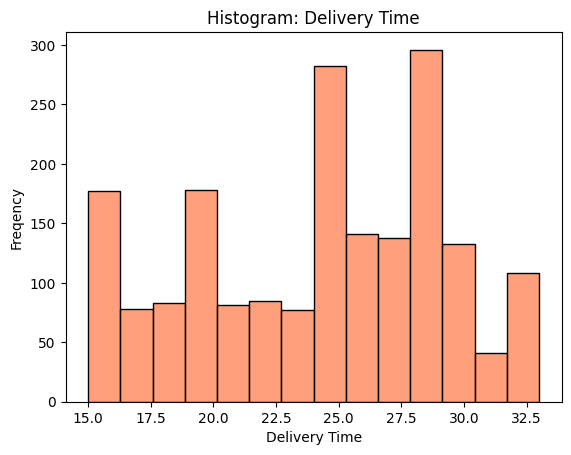

In [90]:
plt.title('Histogram: Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Freqency')
sns.histplot(data=df,x='delivery_time',color='coral');

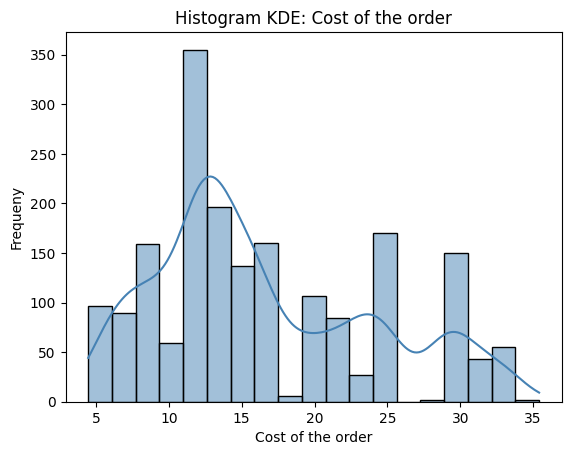

In [91]:
plt.title('Histogram KDE: Cost of the order')
plt.xlabel('Cost of the order')
plt.ylabel('Frequeny')
sns.histplot(data=df,x='cost_of_the_order', kde=True, color='steelblue');

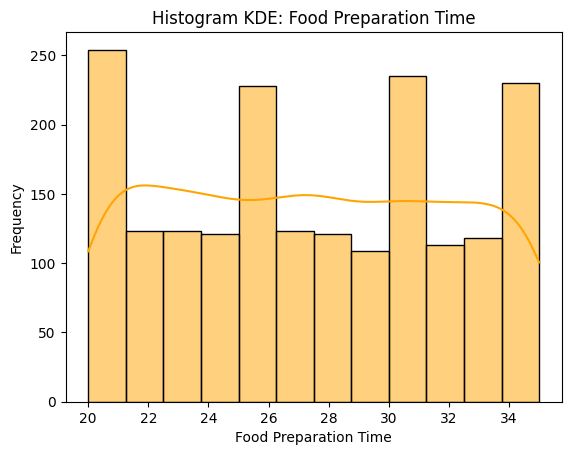

In [92]:
plt.title('Histogram KDE: Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time', kde= True, color='orange');

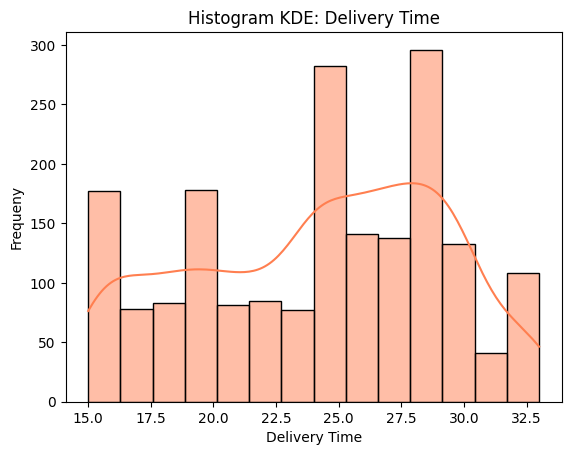

In [93]:
plt.title('Histogram KDE: Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequeny')
sns.histplot(data=df,x='delivery_time', kde=True, color='coral');

##### Observation:
  * Cost of Orders:
    * Most orders costing between $10-20
  * Food Preparation Time:
    * Shows a somewhat normal distribution centered around 25-30 minutes
  * Delivery Time:
    * Fairly normally distributed around 20-25 minutes


#### Box Plot



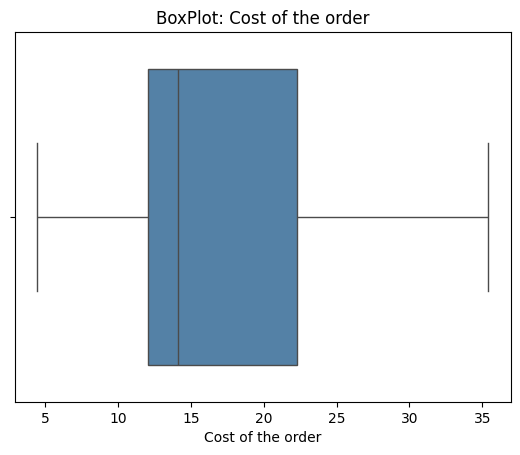

In [94]:
plt.title('BoxPlot: Cost of the order')
plt.xlabel('Cost of the order')
sns.boxplot(data=df,x='cost_of_the_order', color='steelblue');

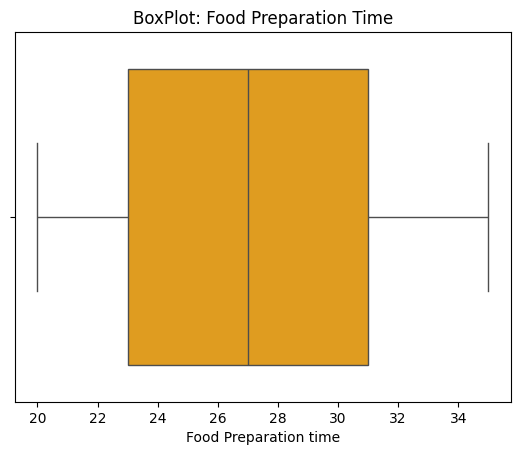

In [95]:
plt.title('BoxPlot: Food Preparation Time')
plt.xlabel('Food Preparation time')
sns.boxplot(data=df, x='food_preparation_time',color='orange');

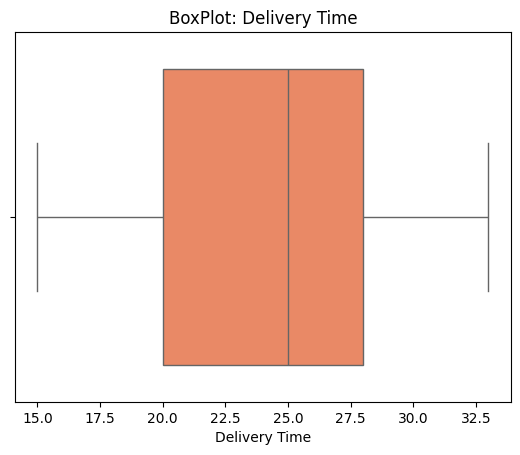

In [96]:
plt.title('BoxPlot: Delivery Time')
plt.xlabel('Delivery Time')
sns.boxplot(data=df,x='delivery_time',color='coral');

##### Observation:
  * Cost of Orders:
    * The distribution is right-skewed
    * The median cost appears to be around $15
  * Food Preparation Time:
    * The median preparation times to be around 27 minutes
  * Delivery Time:
    * The median delivery time to be around 25 minutes

#### Violin Graph

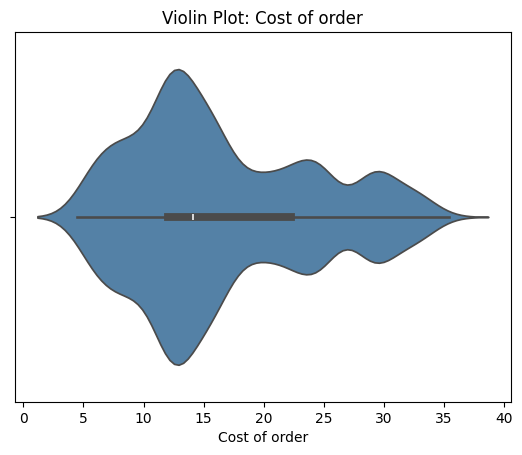

In [97]:
plt.title('Violin Plot: Cost of order')
plt.xlabel('Cost of order')
sns.violinplot(data=df,x='cost_of_the_order', color='steelblue');

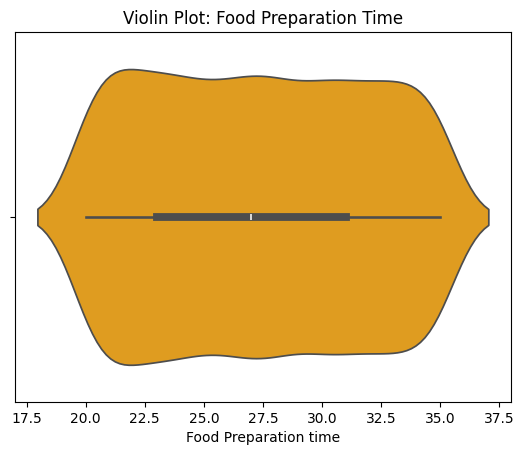

In [98]:
plt.title('Violin Plot: Food Preparation Time')
plt.xlabel('Food Preparation time')
sns.violinplot(data=df, x='food_preparation_time',color='orange');

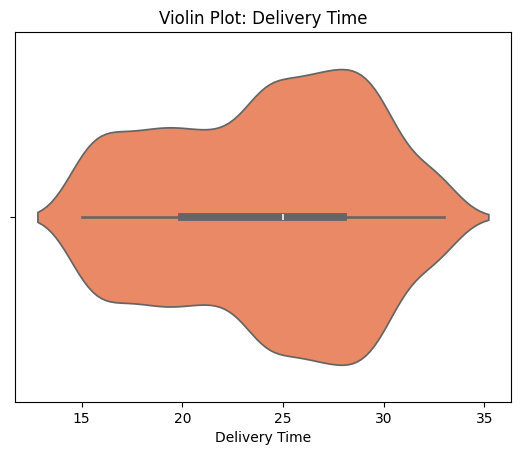

In [99]:
plt.title('Violin Plot: Delivery Time')
plt.xlabel('Delivery Time')
sns.violinplot(data=df,x='delivery_time',color='coral');

##### Observation:
  * Cost of Orders:
    * The distribution is right-skewed
    * Most orders costing between $10-20
    * The median cost appears to be around $15
  * Food Preparation Time:
    * The median preparation times to be around 27 minutes
  * Delivery Time:
    * The median delivery time to be around 25 minutes


#### Bar Graph (Count plot)

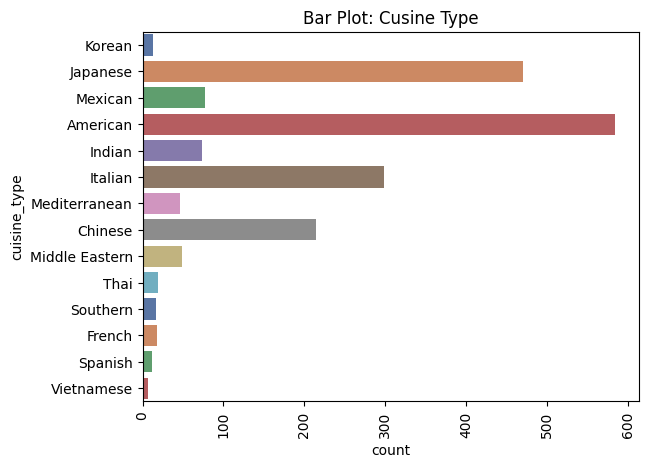

In [100]:
plt.title('Bar Plot: Cusine Type')
sns.countplot(data=df,y='cuisine_type',hue='cuisine_type',legend=False, palette='deep');
plt.xticks(rotation=90);

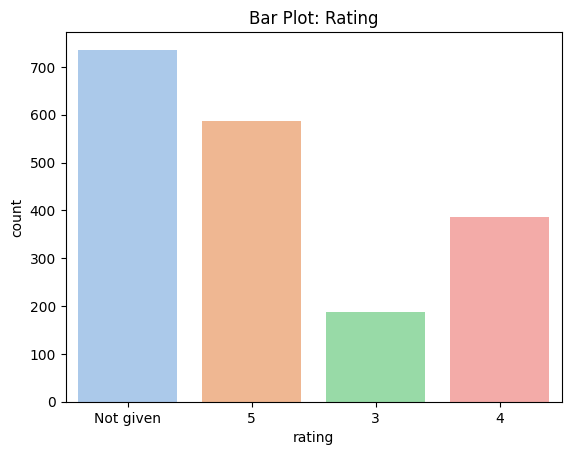

In [101]:
plt.title('Bar Plot: Rating')
sns.countplot(data=df,x='rating',hue='rating',legend=False, palette='pastel');

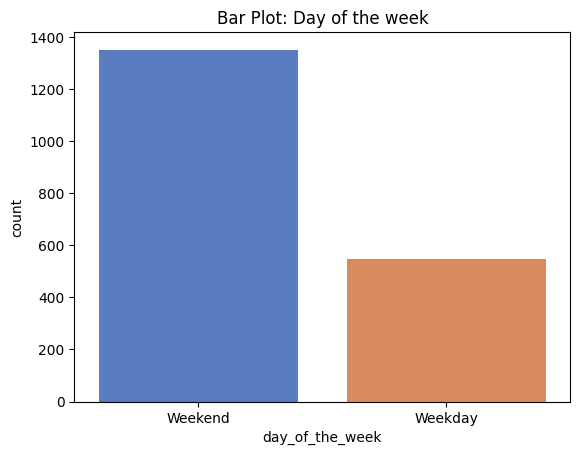

In [102]:
plt.title('Bar Plot: Day of the week')
sns.countplot(data=df,x='day_of_the_week',hue='day_of_the_week',legend=False, palette='muted');

##### Observation:
* Cuisine Type:
  * American cuisine is the most ordered
  * Japanese and Italian are also popular choices
  * Vietnamese and Spanish cuisines have the fewest orders

* Rating:
  * "Not given" - many customers don't provide ratings
  * "4" is the most common rating
  * "5" is the highest rating
  * "3" is the least rating

* Day of the Week:
  * More orders on weekends then weekdays

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

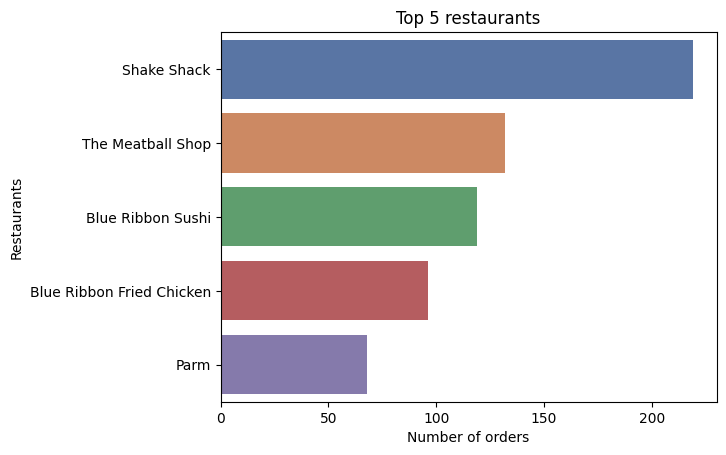

In [103]:
filtered_restaurant = df['restaurant_name'].value_counts().head(5)
plt.title('Top 5 restaurants')
plt.xlabel('Number of orders')
plt.ylabel('Restaurants')
sns.barplot(y=filtered_restaurant.index,x=filtered_restaurant.values,hue=filtered_restaurant.index,legend=False, palette='deep');

#### Observations:
Below are the top 5 restaurants name:
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [104]:
filetered_day_of_the_week_df = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine_weekend=filetered_day_of_the_week_df['cuisine_type'].value_counts()
popular_cuisine_weekend.idxmax()

'American'

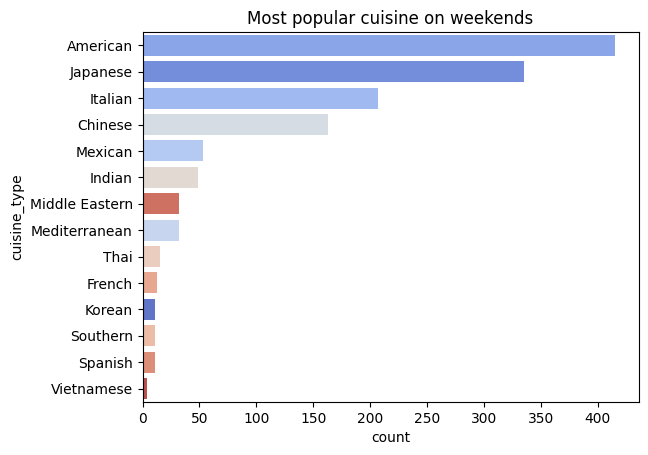

In [105]:
filetered_day_of_the_week_df = df[df['day_of_the_week'] == 'Weekend']
plt.title('Most popular cuisine on weekends')
sns.countplot(data=filetered_day_of_the_week_df,y='cuisine_type',order=filetered_day_of_the_week_df['cuisine_type'].value_counts().index, hue='cuisine_type',legend=False, palette='coolwarm');

#### Observations:
 "American" cuisine is the most popular on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [106]:
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100
percentage_above_20

29.24130663856691

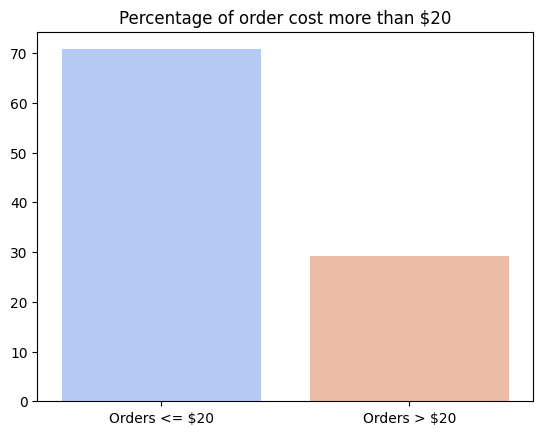

In [107]:
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100
category = ['Orders <= $20', 'Orders > $20']
percentages = [100 - percentage_above_20, percentage_above_20]
plt.title('Percentage of order cost more than $20')
sns.barplot(x=category, y=percentages, hue=category, legend=False, palette='coolwarm');

#### Observations:
The percentage of order cost more than $20 is : 29.24130663856691

### **Question 10**: What is the mean order delivery time? [1 mark]

In [108]:
float(df['delivery_time'].mean())

24.161749209694417

#### Observations:
The mean order delivery time is : 24.161749209694417

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [109]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Below is the information of top 3 most frequent customers ID's and the numbers of order they placed

 | Customer_ID  | Number of Orders |
 |--------------|------------------|
 | 52832        | 13               |
 | 47440        | 10               |
 | 83287        | 9                |



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


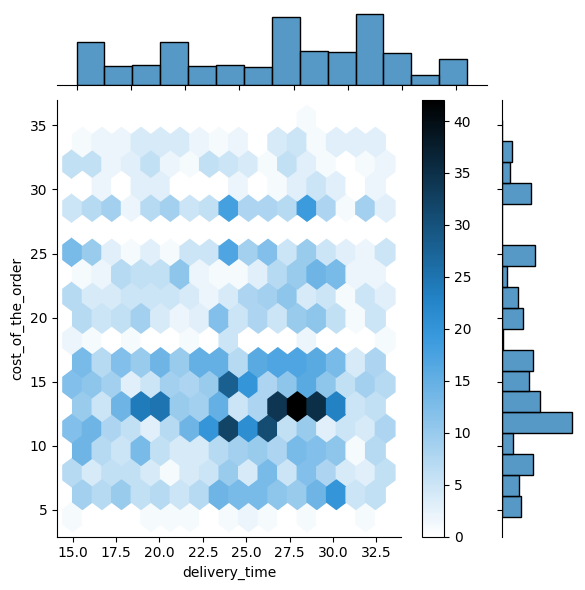

In [110]:
sns.jointplot(data=df, x='delivery_time', y='cost_of_the_order',kind='hex');
plt.colorbar();

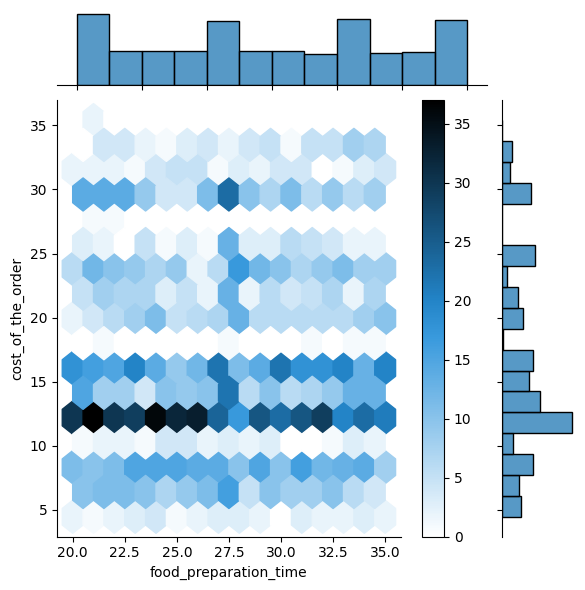

In [111]:
sns.jointplot(data=df, x='food_preparation_time', y='cost_of_the_order',kind='hex');
plt.colorbar();

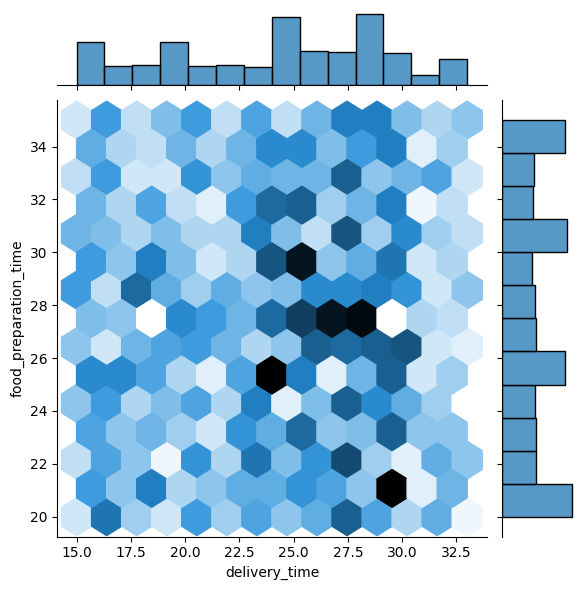

In [112]:
sns.jointplot(data=df, x='delivery_time', y='food_preparation_time',kind='hex');

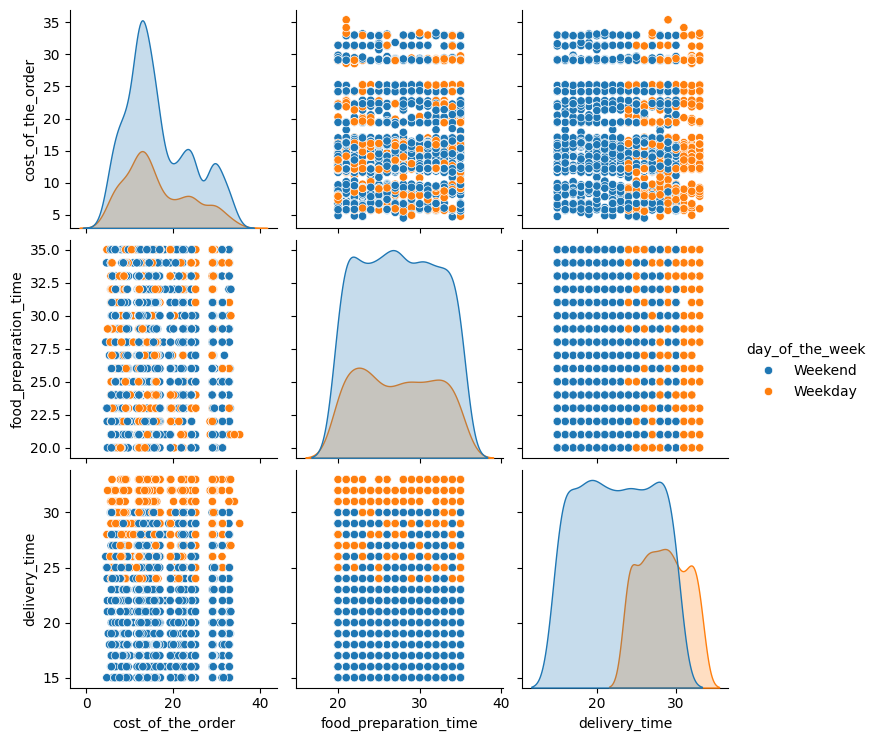

In [113]:
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='day_of_the_week');

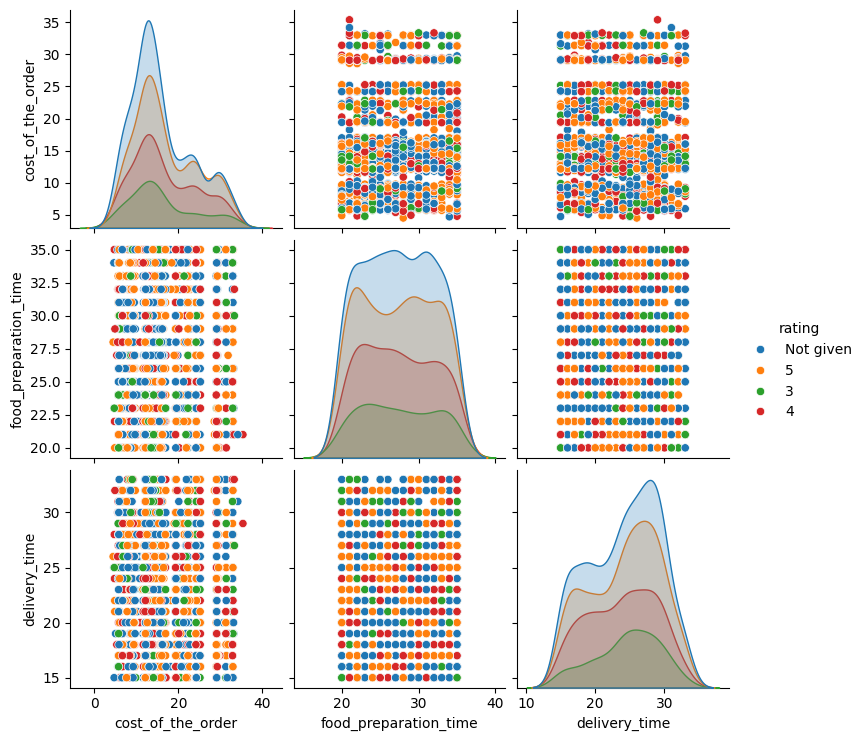

In [114]:
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='rating');

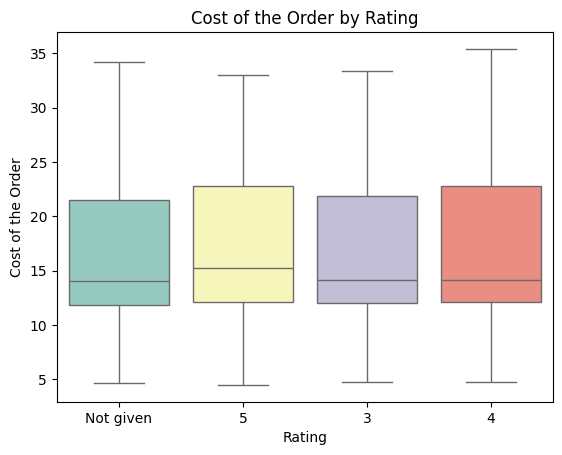

In [115]:
plt.title('Cost of the Order by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
sns.boxplot(data=df, x='rating', y='cost_of_the_order',hue='rating',legend=False, palette='Set3');

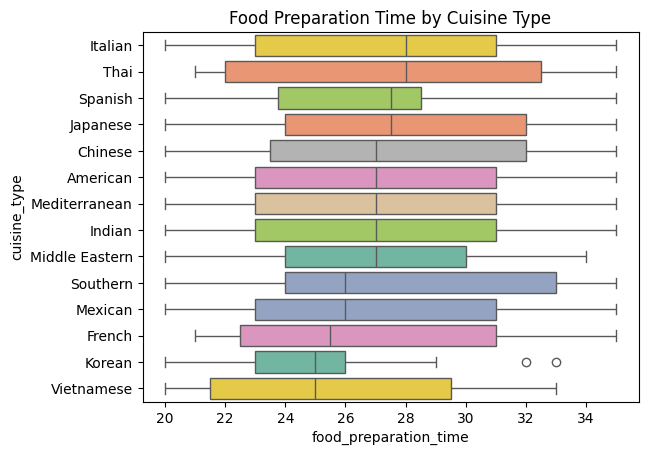

In [116]:
plt.title('Food Preparation Time by Cuisine Type')
order = df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type', order=order,hue='cuisine_type',palette='Set2');

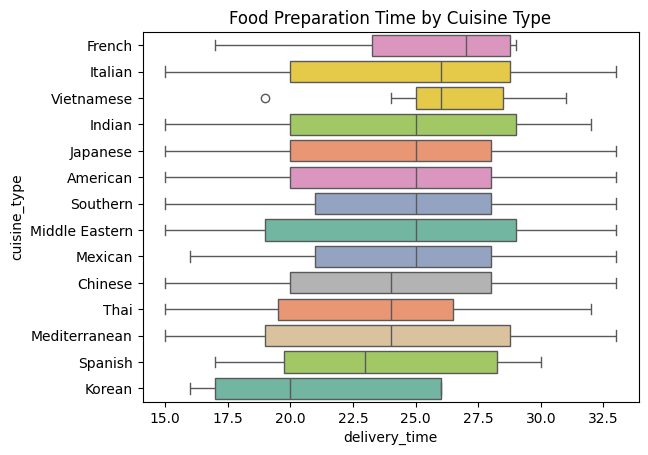

In [117]:
plt.title('Food Preparation Time by Cuisine Type')
order = df.groupby('cuisine_type')['delivery_time'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='delivery_time',y='cuisine_type', order=order,hue='cuisine_type',palette='Set2');

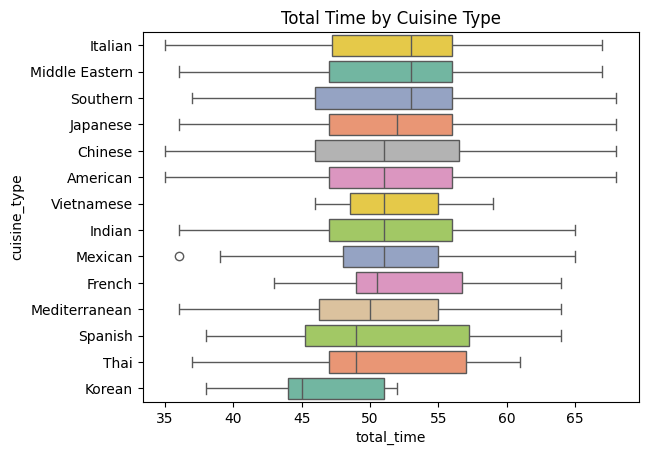

In [118]:
df_with_totaltime = df.copy()
df_with_totaltime['total_time'] = df_with_totaltime['food_preparation_time'] + df_with_totaltime['delivery_time']
plt.title('Total Time by Cuisine Type')
order = df_with_totaltime.groupby('cuisine_type')['total_time'].median().sort_values(ascending=False).index
sns.boxplot(data=df_with_totaltime,x='total_time',y='cuisine_type', order=order,hue='cuisine_type',palette='Set2');

##### Observation:
* Orders with a rating of 5 tend to have a slightly higher median cost compared to other ratings
* Orders with "Not given" ratings show the widest range of costs, suggesting no clear relationship between cost and rating
* No strong linear relationship between cost and delivery time
* Italian cuisine has the highest median preparation time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [119]:
pd.set_option('mode.chained_assignment', None)
df_with_ratings = df[df['rating'] != 'Not given']
df_with_ratings.loc[:, 'rating_numeric'] = df_with_ratings['rating'].astype(int);
restaurant_ratings = df_with_ratings.groupby('restaurant_name').agg(
    rating_count=('rating_numeric', 'count'),
    avg_rating=('rating_numeric', 'mean')
)
promotional_restaurants = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) &
    (restaurant_ratings['avg_rating'] > 4)
]
promotional_restaurants = promotional_restaurants.sort_values(by='avg_rating', ascending=False);
print("\
Restaurants qualifying for promotional offer (rating count > 50 and avg rating > 4):")
print(promotional_restaurants)

Restaurants qualifying for promotional offer (rating count > 50 and avg rating > 4):
                           rating_count  avg_rating
restaurant_name                                    
The Meatball Shop                    84    4.511905
Blue Ribbon Fried Chicken            64    4.328125
Shake Shack                         133    4.278195
Blue Ribbon Sushi                    73    4.219178


##### Observations:
Restaurants qualifying for promotional offer (rating count > 50 and avg rating > 4):

| restaurant_name              | rating_count  | avg_rating |
|------------------------------|---------------|------------|
| The Meatball Shop            |       84      | 4.511905   |
| Blue Ribbon Fried Chicken    |       64      | 4.328125   |
| Shake Shack                  |      133      | 4.278195   |
| Blue Ribbon Sushi            |       73      | 4.219178   |

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [120]:
def calculate_fee(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')

# Compute fees for each order
fees = df['cost_of_the_order'].apply(calculate_fee)

# Sum total fees
net_revenue = fees.sum()

print('Net revenue generated by the company across all orders: $' + str(net_revenue))


Net revenue generated by the company across all orders: $6166.303


#### Observations:
Net revenue generated by the company across all orders: $6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [121]:
orders_over_60_min = df_with_totaltime[df_with_totaltime['total_time'] > 60]
percentage_over_60_min = (len(orders_over_60_min) / len(df)) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60_min:.2f}%")
print(f"Number of orders taking more than 60 minutes: {len(orders_over_60_min)} out of {len(df)} total orders")


Percentage of orders taking more than 60 minutes: 10.54%
Number of orders taking more than 60 minutes: 200 out of 1898 total orders


#### Observations:
* Percentage of orders taking more than 60 minutes: 10.54%
* Number of orders taking more than 60 minutes: 200 out of 1898 total orders

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [127]:
delivery_time_on_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
delivery_time_on_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f"Delivery Time on weekdays : {delivery_time_on_weekdays}\nDelivery Time on Weekend: {delivery_time_on_weekend}")

Delivery Time on weekdays : 28.340036563071298
Delivery Time on Weekend: 22.4700222057735


In [129]:
food_preparation__time_on_weekdays = df[df['day_of_the_week'] == 'Weekday']['food_preparation_time'].mean()
food_preparation_time_on_weekend = df[df['day_of_the_week'] == 'Weekend']['food_preparation_time'].mean()
print(f"Food Preparation Time on weekdays : {food_preparation__time_on_weekdays}\nFood Preparation Time on Weekend: {food_preparation_time_on_weekend}")

Food Preparation Time on weekdays : 27.212065813528337
Food Preparation Time on Weekend: 27.436713545521837


##### Observation:
The mean food preparation time on weekdays and weekends are same, so the mean delivery time vary during weekdays and weekends, its due to road routes were busy on weekdays when compare to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The data indicates that restaurants like The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi qualify for promotional offers based on having both a sufficient number of ratings and high average ratings.
* The fee structure of charging a higher percentage for larger orders generates a significant portion of revenue (net revenue of approximately $6,166 across all orders).
* Although only about 10.5% of orders take over 60 minutes from order placement to delivery (predominantly on weekdays), timely delivery is critical.

### Recommendations:
* Analyze cuisine-specific performance: identify which cuisine types consistently receive higher ratings and quick delivery times.
* Use customer feedback ratings to work with restaurants to improve quality in areas where ratings are lower.
* For restaurants with longer delivery times, consider operational improvements (e.g., reducing food preparation time or optimizing delivery routes).
* Analyze the pricing dynamics further to ensure that fee structures remain competitive while supporting high-margin orders.

---